In [19]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy.optimize import fsolve

# Берестов Иван Михайлович


# LR №3. «Решние линейных и нелинейных систем разными методами»
Вариант 2

# 1) Создать матрицу 3х3 из случайных целых чисел из отрезка [-8, 8].
Методом Грама-Шмидта ортогонализовать первые два столбца матрицы. Найти QR разложение матрицы методом Грама-Шмидта. Проверить методом np.linalg

In [20]:
def gram_schmidt_qr(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    R = np.zeros((m, m))
    
    for j in range(m):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

# Создаем случайную матрицу 3x3 из диапазона [-8, 8]
np.random.seed(42)
A = np.random.randint(-8, 9, size=(3, 3)).astype(float)
print("Исходная матрица A:")
print(A)

# Находим QR разложение
Q, R = gram_schmidt_qr(A)
print("\nМатрица Q:")
print(Q)
print("\nМатрица R:")
print(R)

# Проверка ортогональности Q
print("\nQ^T * Q:")
print(np.round(Q.T @ Q, 10))

# Проверка разложения
print("\nПроверка QR = A:")
print(np.round(Q @ R, 10))
print("Оригинальная A:")
print(A)

# Сравнение с numpy
print("\nПроверка с numpy.linalg.qr:")
Q_np, R_np = np.linalg.qr(A)
print("Q от numpy:")
print(Q_np)
print("R от numpy:")
print(R_np)


Исходная матрица A:
[[-2.  6.  2.]
 [-1. -2.  2.]
 [ 2. -5. -1.]]

Матрица Q:
[[-0.66666667  0.34310016  0.66169316]
 [-0.33333333 -0.93127185  0.14704292]
 [ 0.66666667 -0.12253577  0.73521462]]

Матрица R:
[[ 3.         -6.66666667 -2.66666667]
 [ 0.          4.5338235  -1.05380763]
 [ 0.          0.          0.88225755]]

Q^T * Q:
[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]

Проверка QR = A:
[[-2.  6.  2.]
 [-1. -2.  2.]
 [ 2. -5. -1.]]
Оригинальная A:
[[-2.  6.  2.]
 [-1. -2.  2.]
 [ 2. -5. -1.]]

Проверка с numpy.linalg.qr:
Q от numpy:
[[-0.66666667  0.34310016  0.66169316]
 [-0.33333333 -0.93127185  0.14704292]
 [ 0.66666667 -0.12253577  0.73521462]]
R от numpy:
[[ 3.         -6.66666667 -2.66666667]
 [ 0.          4.5338235  -1.05380763]
 [ 0.          0.          0.88225755]]


# 2) Решить систему с помощью QR разложения матрицы А. QR разложение найти методом Грама-Шмидта. Проверить полученное решение непосредственной подстановкой в исходную систему, а также методом np.solve.
$$\begin{cases}
8.2x_1 - 3.2x_2 + 14.2x_3 + 14.8x_4 = -8.4 \\
5.6x_1 - 12x_2 + 15x_3 - 6.4x_4 = 4.5 \\
5.7x_1 + 3.6x_2 - 12.4x_3 - 2.3x_4 = 3.3 \\
6.8x_1 + 13.2x_2 - 6.3x_3 - 8.7x_4 = 14.3
\end{cases}$$

In [21]:
def solve_with_qr(A, b):
    Q, R = gram_schmidt_qr(A)
    # Решаем систему Rx = Q^T b обратной подстановкой
    n = len(b)
    QTb = Q.T @ b
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (QTb[i] - np.sum(R[i, i+1:] * x[i+1:])) / R[i, i]
    return x

# Система из варианта 2
A = np.array([
    [8.2, -3.2, 14.2, 14.8],
    [5.6, -12.0, 15.0, -6.4],
    [5.7, 3.6, -12.4, -2.3],
    [6.8, 13.2, -6.3, -8.7]
])
b = np.array([-8.4, 4.5, 3.3, 14.3])

print("Решение системы с помощью QR разложения:")
x = solve_with_qr(A, b)
print("x =", x)

# Проверка с numpy
x_np = np.linalg.solve(A, b)
print("\nПроверка с numpy.linalg.solve:")
print("x_np =", x_np)

# Проверка подстановкой
print("\nНевязка A*x - b:")
print(A @ x - b)

Решение системы с помощью QR разложения:
x = [ 0.34261045  0.44394439  0.17387099 -0.82822646]

Проверка с numpy.linalg.solve:
x_np = [ 0.34261045  0.44394439  0.17387099 -0.82822646]

Невязка A*x - b:
[-5.32907052e-15  2.66453526e-15 -2.22044605e-15  0.00000000e+00]


# 3) Решить систему методом Зейделя с точностью до $10^{-3}$. Проверить выполнение достаточного условия сходимости. 
Если условие не выполняется, в программе выполнить эквивалентные преобразования системы, после этого привести к удобному для итераций виду. Оформить итерации в виде таблицы (можно пользоваться модулями PrettyTable или Pandas). Проверить полученное решение.
$$\begin{cases}
3.1x_1 + 2.8x_2 + 4.9x_3 = 0.2 \\
1.9x_1 + 4.1x_2 + 2.1x_3 = 2.1 \\
7.5x_1 + 3.8x_2 + 4.8x_3 = 5.6
\end{cases}$$

In [22]:
def make_diagonally_dominant(A, b):
    n = len(A)
    for i in range(n):
        # Находим строку с максимальным элементом в текущем столбце
        max_row = np.argmax(np.abs(A[i:, i])) + i
        # Меняем строки местами
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]
    return A, b

def seidel_method(A, b, eps=1e-3, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    table = PrettyTable()
    table.field_names = ["Итерация"] + [f"x{i+1}" for i in range(n)] + ["Погрешность"]
    
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        
        error = np.max(np.abs(x_new - x))
        table.add_row([k+1] + list(np.round(x_new, 5)) + [round(error, 6)])
        
        if error < eps:
            break
        x = x_new
    
    print(table)
    return x_new

A = np.array([
    [3.1, 2.8, 4.9],
    [1.9, 4.1, 2.1],
    [7.5, 3.8, 4.8]
])
b = np.array([0.2, 2.1, 5.6])
print('original:',A,b)
A,b=make_diagonally_dominant(A,b)
print('modified:',A,b)

# Проверка диагонального преобладания
print("Проверка диагонального преобладания:")
for i in range(3):
    print(f"Строка {i+1}:", abs(A[i,i]) > np.sum(np.abs(A[i,:])) - abs(A[i,i]))

print("\nРешение методом Зейделя:")
x = seidel_method(A, b)

# Проверка решения
print("\nПроверка решения:")
print("A*x - b =", A @ x - b)

original: [[3.1 2.8 4.9]
 [1.9 4.1 2.1]
 [7.5 3.8 4.8]] [0.2 2.1 5.6]
modified: [[7.5 3.8 4.8]
 [1.9 4.1 2.1]
 [3.1 2.8 4.9]] [5.6 2.1 0.2]
Проверка диагонального преобладания:
Строка 1: False
Строка 2: True
Строка 3: False

Решение методом Зейделя:
+----------+---------+---------+----------+-------------+
| Итерация |    x1   |    x2   |    x3    | Погрешность |
+----------+---------+---------+----------+-------------+
|    1     | 0.74667 | 0.16618 | -0.52652 |   0.746667  |
|    2     | 0.99944 | 0.31872 | -0.77361 |   0.252778  |
|    3     | 1.08029 | 0.40781 | -0.87567 |   0.102058  |
|    4     | 1.10047 | 0.45073 | -0.91296 |   0.042923  |
|    5     | 1.10259 | 0.46885 | -0.92466 |   0.018119  |
|    6     | 1.10089 | 0.47563 | -0.92746 |   0.006776  |
|    7     | 1.09925 | 0.47782 | -0.92767 |   0.002194  |
|    8     | 1.09828 | 0.47839 | -0.92738 |   0.000974  |
+----------+---------+---------+----------+-------------+

Проверка решения:
A*x - b = [3.55154615e-03 6.1998723

# 4)Решить нелинейное уравнение методом половинного деления с точностью $10^{-3}$ и комбинированным методом с точностью $10^{-5}$ . До решения отделить корни графическим методом, проверить выполнение условий метода
$-1,38x^3-5,42x^2+2,57x+10,95$

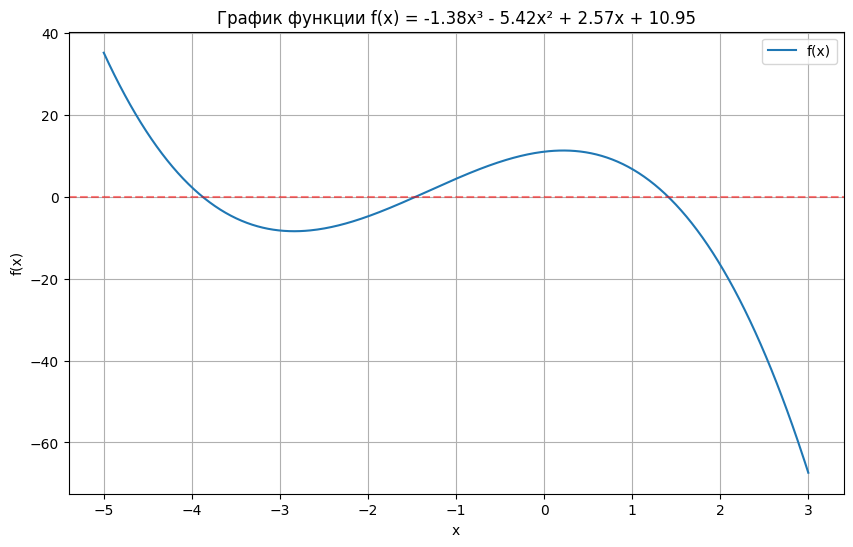

Корень 1 ([-4, -3]):
+----------+----------+----------+----------+---------+----------+----------+-------------+
| Итерация |    a     |    b     |    x     |   f(a)  |   f(b)   |   f(x)   | Погрешность |
+----------+----------+----------+----------+---------+----------+----------+-------------+
|    1     |    -5    |    -2    |   -3.5   |   35.1  |  -4.83   | -5.2725  |     1.5     |
|    2     |    -5    |   -3.5   |  -4.25   |   35.1  | -5.2725  | 8.06531  |     0.75    |
|    3     |  -4.25   |   -3.5   |  -3.875  | 8.06531 | -5.2725  | -0.09738 |    0.375    |
|    4     |  -4.25   |  -3.875  | -4.0625  | 8.06531 | -0.09738 | 3.58323  |    0.1875   |
|    5     | -4.0625  |  -3.875  | -3.96875 | 3.58323 | -0.09738 | 1.64615  |   0.09375   |
|    6     | -3.96875 |  -3.875  | -3.92188 | 1.64615 | -0.09738 | 0.75062  |   0.04688   |
|    7     | -3.92188 |  -3.875  | -3.89844 | 0.75062 | -0.09738 | 0.32073  |   0.02344   |
|    8     | -3.89844 |  -3.875  | -3.88672 | 0.32073 | -0.

In [23]:
def f(x):
    return -1.38*x**3 - 5.42*x**2 + 2.57*x + 10.95

# Построим график для визуализации корней
x_vals = np.linspace(-5, 3, 400)
y_vals = f(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.grid()
plt.title("График функции f(x) = -1.38x³ - 5.42x² + 2.57x + 10.95")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

def bisection_method(f, a, b, eps=1e-3, max_iter=100):
    table = PrettyTable()
    table.field_names = ["Итерация", "a", "b", "x", "f(a)", "f(b)", "f(x)", "Погрешность"]
    
    if f(a) * f(b) > 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала")
    
    for i in range(max_iter):
        x = (a + b) / 2
        error = (b - a) / 2
        table.add_row([
            i+1,
            round(a, 5),
            round(b, 5),
            round(x, 5),
            round(f(a), 5),
            round(f(b), 5),
            round(f(x), 5),
            round(error, 5)
        ])
        
        if abs(f(x)) < eps or error < eps:
            break
            
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
    
    print(table)
    return x

def combined_method(f, a, b, eps=1e-5, max_iter=100):
    # Численно вычисляем производную
    def df(x, h=1e-6):
        return (f(x + h) - f(x - h)) / (2 * h)
    
    table = PrettyTable()
    table.field_names = ["Итерация", "x_chord", "x_newton", "x_combined", "f(x)", "Погрешность"]
    
    x_prev = (a + b) / 2
    for i in range(max_iter):
        # Метод хорд
        x_chord = a - f(a) * (b - a) / (f(b) - f(a))
        
        # Метод Ньютона
        x_newton = x_prev - f(x_prev) / df(x_prev)
        
        # Комбинированный результат
        x_combined = (x_chord + x_newton) / 2
        error = abs(x_combined - x_prev)
        
        table.add_row([
            i+1,
            round(x_chord, 6),
            round(x_newton, 6),
            round(x_combined, 6),
            round(f(x_combined), 6),
            round(error, 6)
        ])
        
        if abs(f(x_combined)) < eps or error < eps:
            break
            
        # Выбираем новый интервал
        if f(a) * f(x_combined) < 0:
            b = x_combined
        else:
            a = x_combined
            
        x_prev = x_combined
    
    print(table)
    return x_combined

print("Корень 1 ([-4, -3]):")
root1_bisect = bisection_method(f, -5, -2)
print("\nКомбинированный метод для корня 1 ([-4, -3]):")
root1_combined = combined_method(f, -5, -2)
print("\nКорень 2 ([-1, 0]):")
root2_bisect = bisection_method(f, -2, -1)
print("\nКомбинированный метод для корня 2 ([-1, 0]):")
root2_combined = combined_method(f, -2, -1)
print("\nКорень 3 ([1, 2]):")
root3_bisect = bisection_method(f, 0, 2)
print("\nКомбинированный метод для корня 3 ([1, 2]):")
root3_combined = combined_method(f, 0, 2)

# 5) Решить систему нелинейных уравнений методом Ньютона с точностью $10^{-4}$
$\begin{cases}
\sin(x) + 2y = 2 \\
2x + \cos(y-1) = 0.7
\end{cases}$

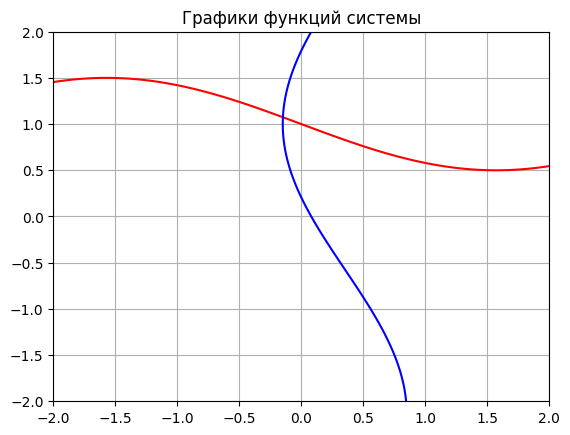

Матрица Якоби в начальной точке:
[[0.87758256 2.        ]
 [2.         0.47942554]]

Метод Ньютона для системы:
+----------+-------------+------------+-------------+-------------+-------------+
| Итерация |      x      |     y      |   f1(x,y)   |   f2(x,y)   | Погрешность |
+----------+-------------+------------+-------------+-------------+-------------+
|    1     | -0.22773102 | 1.07960926 | -0.52057446 |  1.17758256 |  0.72773102 |
|    2     | -0.14862546 | 1.07435228 | -0.06654919 | -0.15862919 |  0.07910556 |
|    3     | -0.14863011 | 1.07404174 |  0.00062568 |  -1.378e-05 |  0.00031054 |
|    4     | -0.14863008 | 1.07404173 |     0.0     |    -5e-08   |    2e-08    |
+----------+-------------+------------+-------------+-------------+-------------+

Проверка решения:
f1(x,y) = -2.220446049250313e-16
f2(x,y) = 0.0


In [24]:
def newton_system(F, J, x0, eps=1e-4, max_iter=100):
    table = PrettyTable()
    table.field_names = ["Итерация", "x", "y", "f1(x,y)", "f2(x,y)", "Погрешность"]
    x_prev = x0.copy()
    
    for k in range(max_iter):
        # Вычисляем функции и матрицу Якоби в текущей точке
        F_val = F(x_prev)
        J_val = J(x_prev)
        
        # Решаем систему J * Δ = -F
        delta = np.linalg.solve(J_val, -F_val)
        x_new = x_prev + delta
        
        # Вычисляем погрешность
        error = np.max(np.abs(delta))
        
        table.add_row([
            k+1,
            round(x_new[0], 8),
            round(x_new[1], 8),
            round(F_val[0], 8),
            round(F_val[1], 8),
            round(error, 8)
        ])
        
        if error < eps:
            break
        x_prev = x_new
    
    print(table)
    return x_new

# Определяем функции системы
def F(p):
    x, y = p
    return np.array([
        np.sin(x) + 2*y - 2,
        2*x + np.cos(y-1) - 0.7
    ])

# Матрица Якоби
def J(p):
    x, y = p
    return np.array([
        [np.cos(x), 2],
        [2, -np.sin(y-1)]
    ])

# Графическое определение начального приближения
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) + 2*Y - 2
Z2 = 2*X + np.cos(Y-1) - 0.7

plt.contour(X, Y, Z1, levels=[0], colors='r')
plt.contour(X, Y, Z2, levels=[0], colors='b')
plt.grid()
plt.title("Графики функций системы")
plt.show()

# Начальное приближение визуально: (0.5, 0.5)
x0 = np.array([0.5, 0.5])

print("Матрица Якоби в начальной точке:")
print(J(x0))

print("\nМетод Ньютона для системы:")
solution = newton_system(F, J, x0)

print("\nПроверка решения:")
print("f1(x,y) =", F(solution)[0])
print("f2(x,y) =", F(solution)[1])